<a href="https://colab.research.google.com/github/mathewdavid/maths_data_science/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Movie Recommendation System</h1></center>

**In this notebook, we will focus on implementing a content-based recommendation system, which is one of the types of recommendation systems. Before diving into the implementation, let's briefly discuss the three main types of recommendation systems:**

Popularity-Based Recommendation System:
This type of recommendation system ranks movies or videos based on their popularity. It tracks the view counts or user engagement metrics for each movie or video and lists them in descending order of popularity. The assumption is that popular movies are more likely to be enjoyed by a wider audience.

**Content-Based Recommendation System:
Content-based recommendation systems analyze the characteristics or content of a movie or item to suggest similar items to the user. For example, if a user likes a particular movie, this system analyzes the movie's attributes, such as genre, actors, director, plot keywords, etc., and finds other movies with similar attributes. It then ranks these similar movies based on their similarity scores and recommends the most relevant ones to the user.**

Collaborative Filtering Recommendation System:
Collaborative filtering recommendation systems make recommendations based on the collaboration or similarity between users' preferences. It analyzes the historical data of user ratings or interactions with items and identifies users with similar preferences. It then suggests items that the similar users have rated or interacted with but the target user has not yet encountered. This approach leverages the wisdom of the crowd to make recommendations.

**In this notebook, our focus is on implementing a content-based recommendation system. We will use the characteristics or content of movies to find similar movies and provide personalized recommendations based on a user's preferences.**

#Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np

#Loading data files

In [2]:
mov=pd.read_csv('movies.csv')
rat=pd.read_csv('ratings.csv')

In [3]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [4]:
rat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [5]:
mov.shape

(10329, 3)

In [6]:
rat.shape

(105339, 4)

In [7]:
mov.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [8]:
rat.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [9]:
mov.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
rat.head(5)

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [11]:
mov.tail(5)

,movieId,title,genres
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama
10328,149532,Marco Polo: One Hundred Eyes (2015),(no genres listed)


In [12]:
rat.tail(5)

,userId,movieId,rating,timestamp
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898
105338,668,148626,4.5,1451148148


In [13]:
genres=[]
for genre in mov.genres:
  x=genre.split('|')
  for i in x:
    if i not in genres:
      genres.append(i)
genres = str(genres)

genres=str(genres)    
movie_title=[]
for title in mov.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)

#Data Visualization

In [14]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2,min_word_length=3).generate(genres)

wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2,min_word_length=3).generate(movie_title)

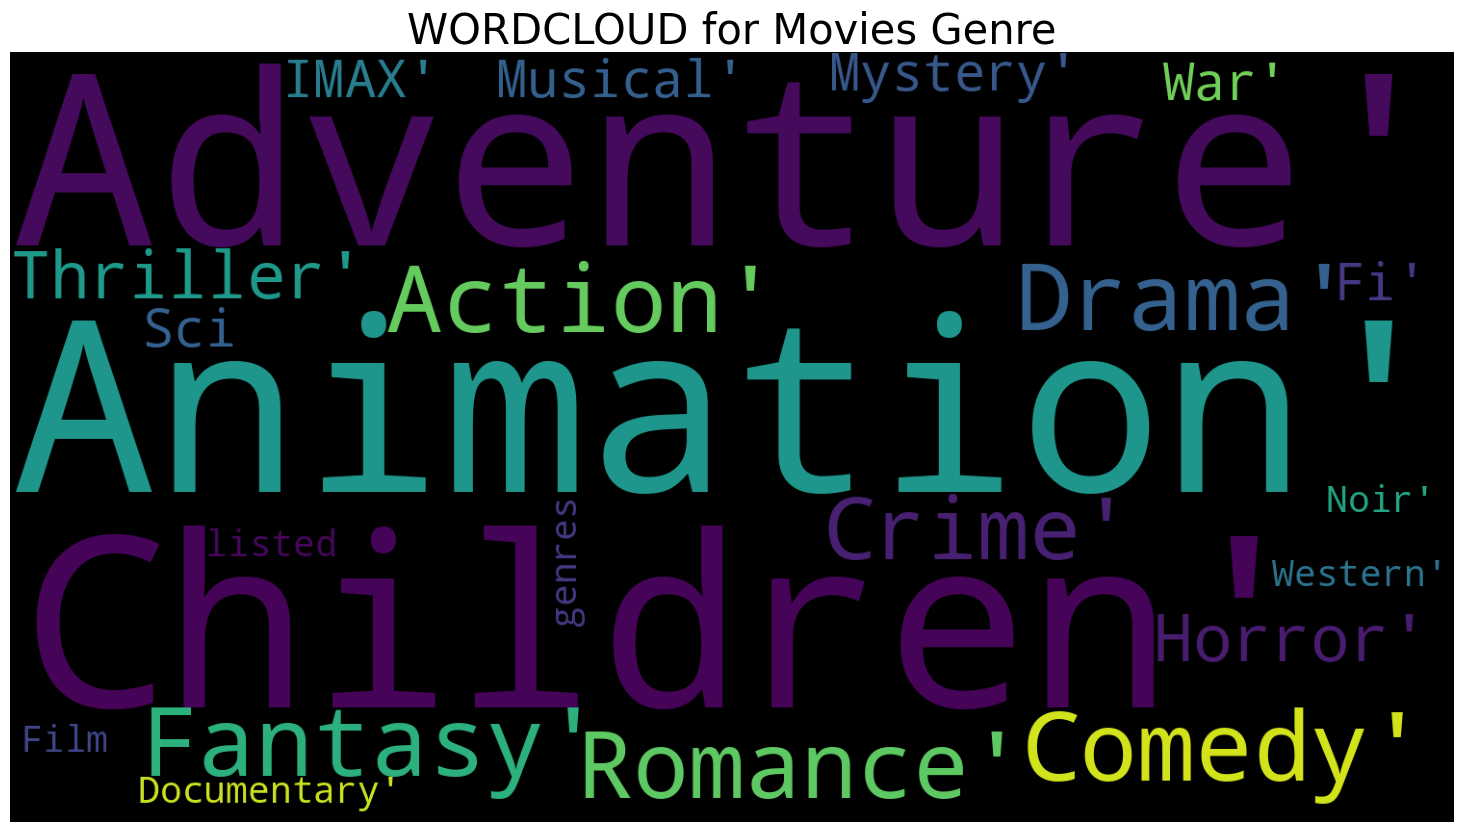

In [15]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

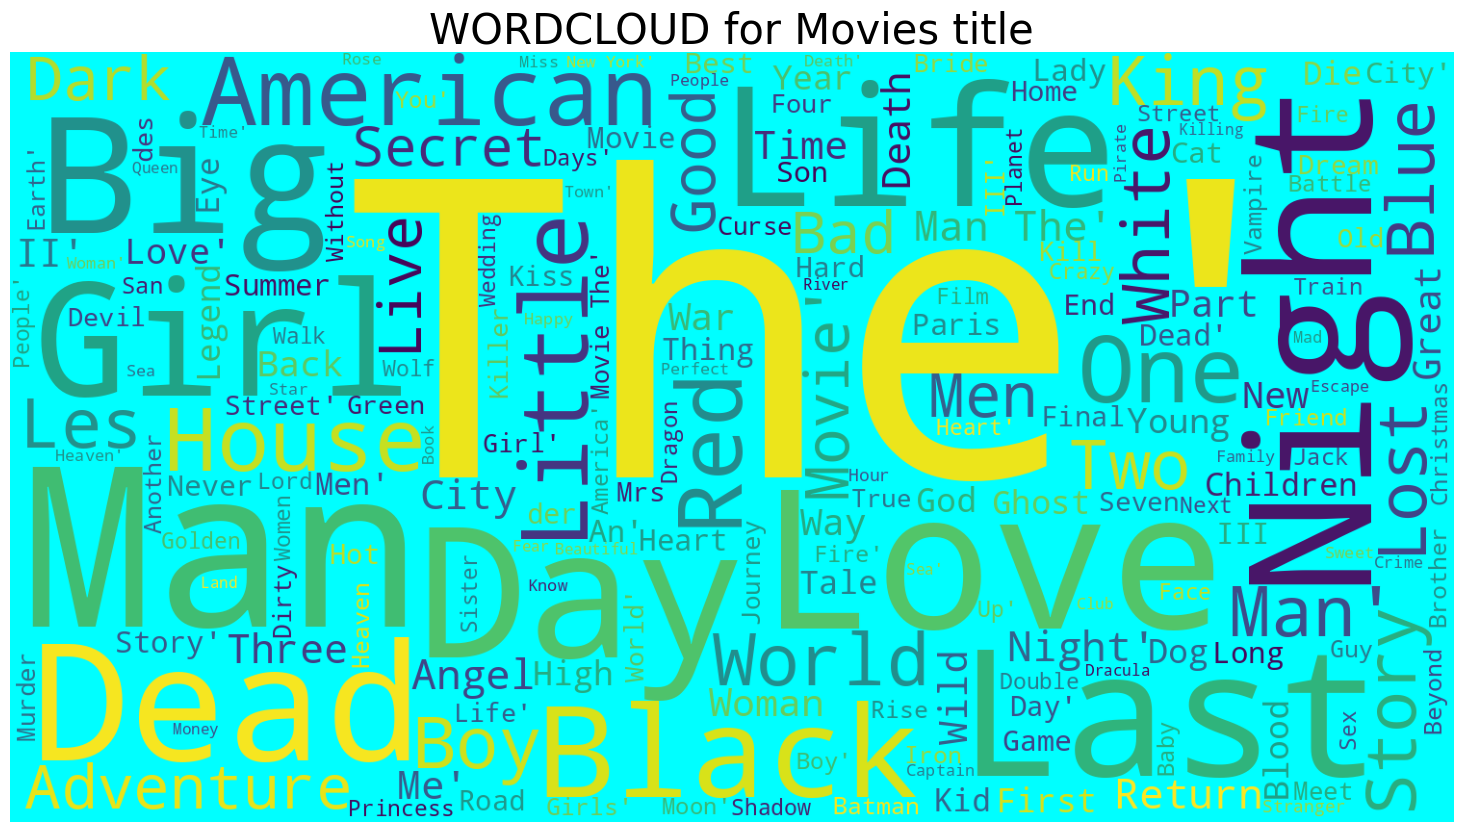

In [16]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies title',fontsize=30)
plt.imshow(wordcloud_title)

In [17]:
new_mov = pd.merge(rat, mov, how='left', on='movieId')
new_mov.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [18]:
new_mov1 = new_mov.groupby(['title'])[['rating']].sum()
high_rated = new_mov1.nlargest(20, 'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


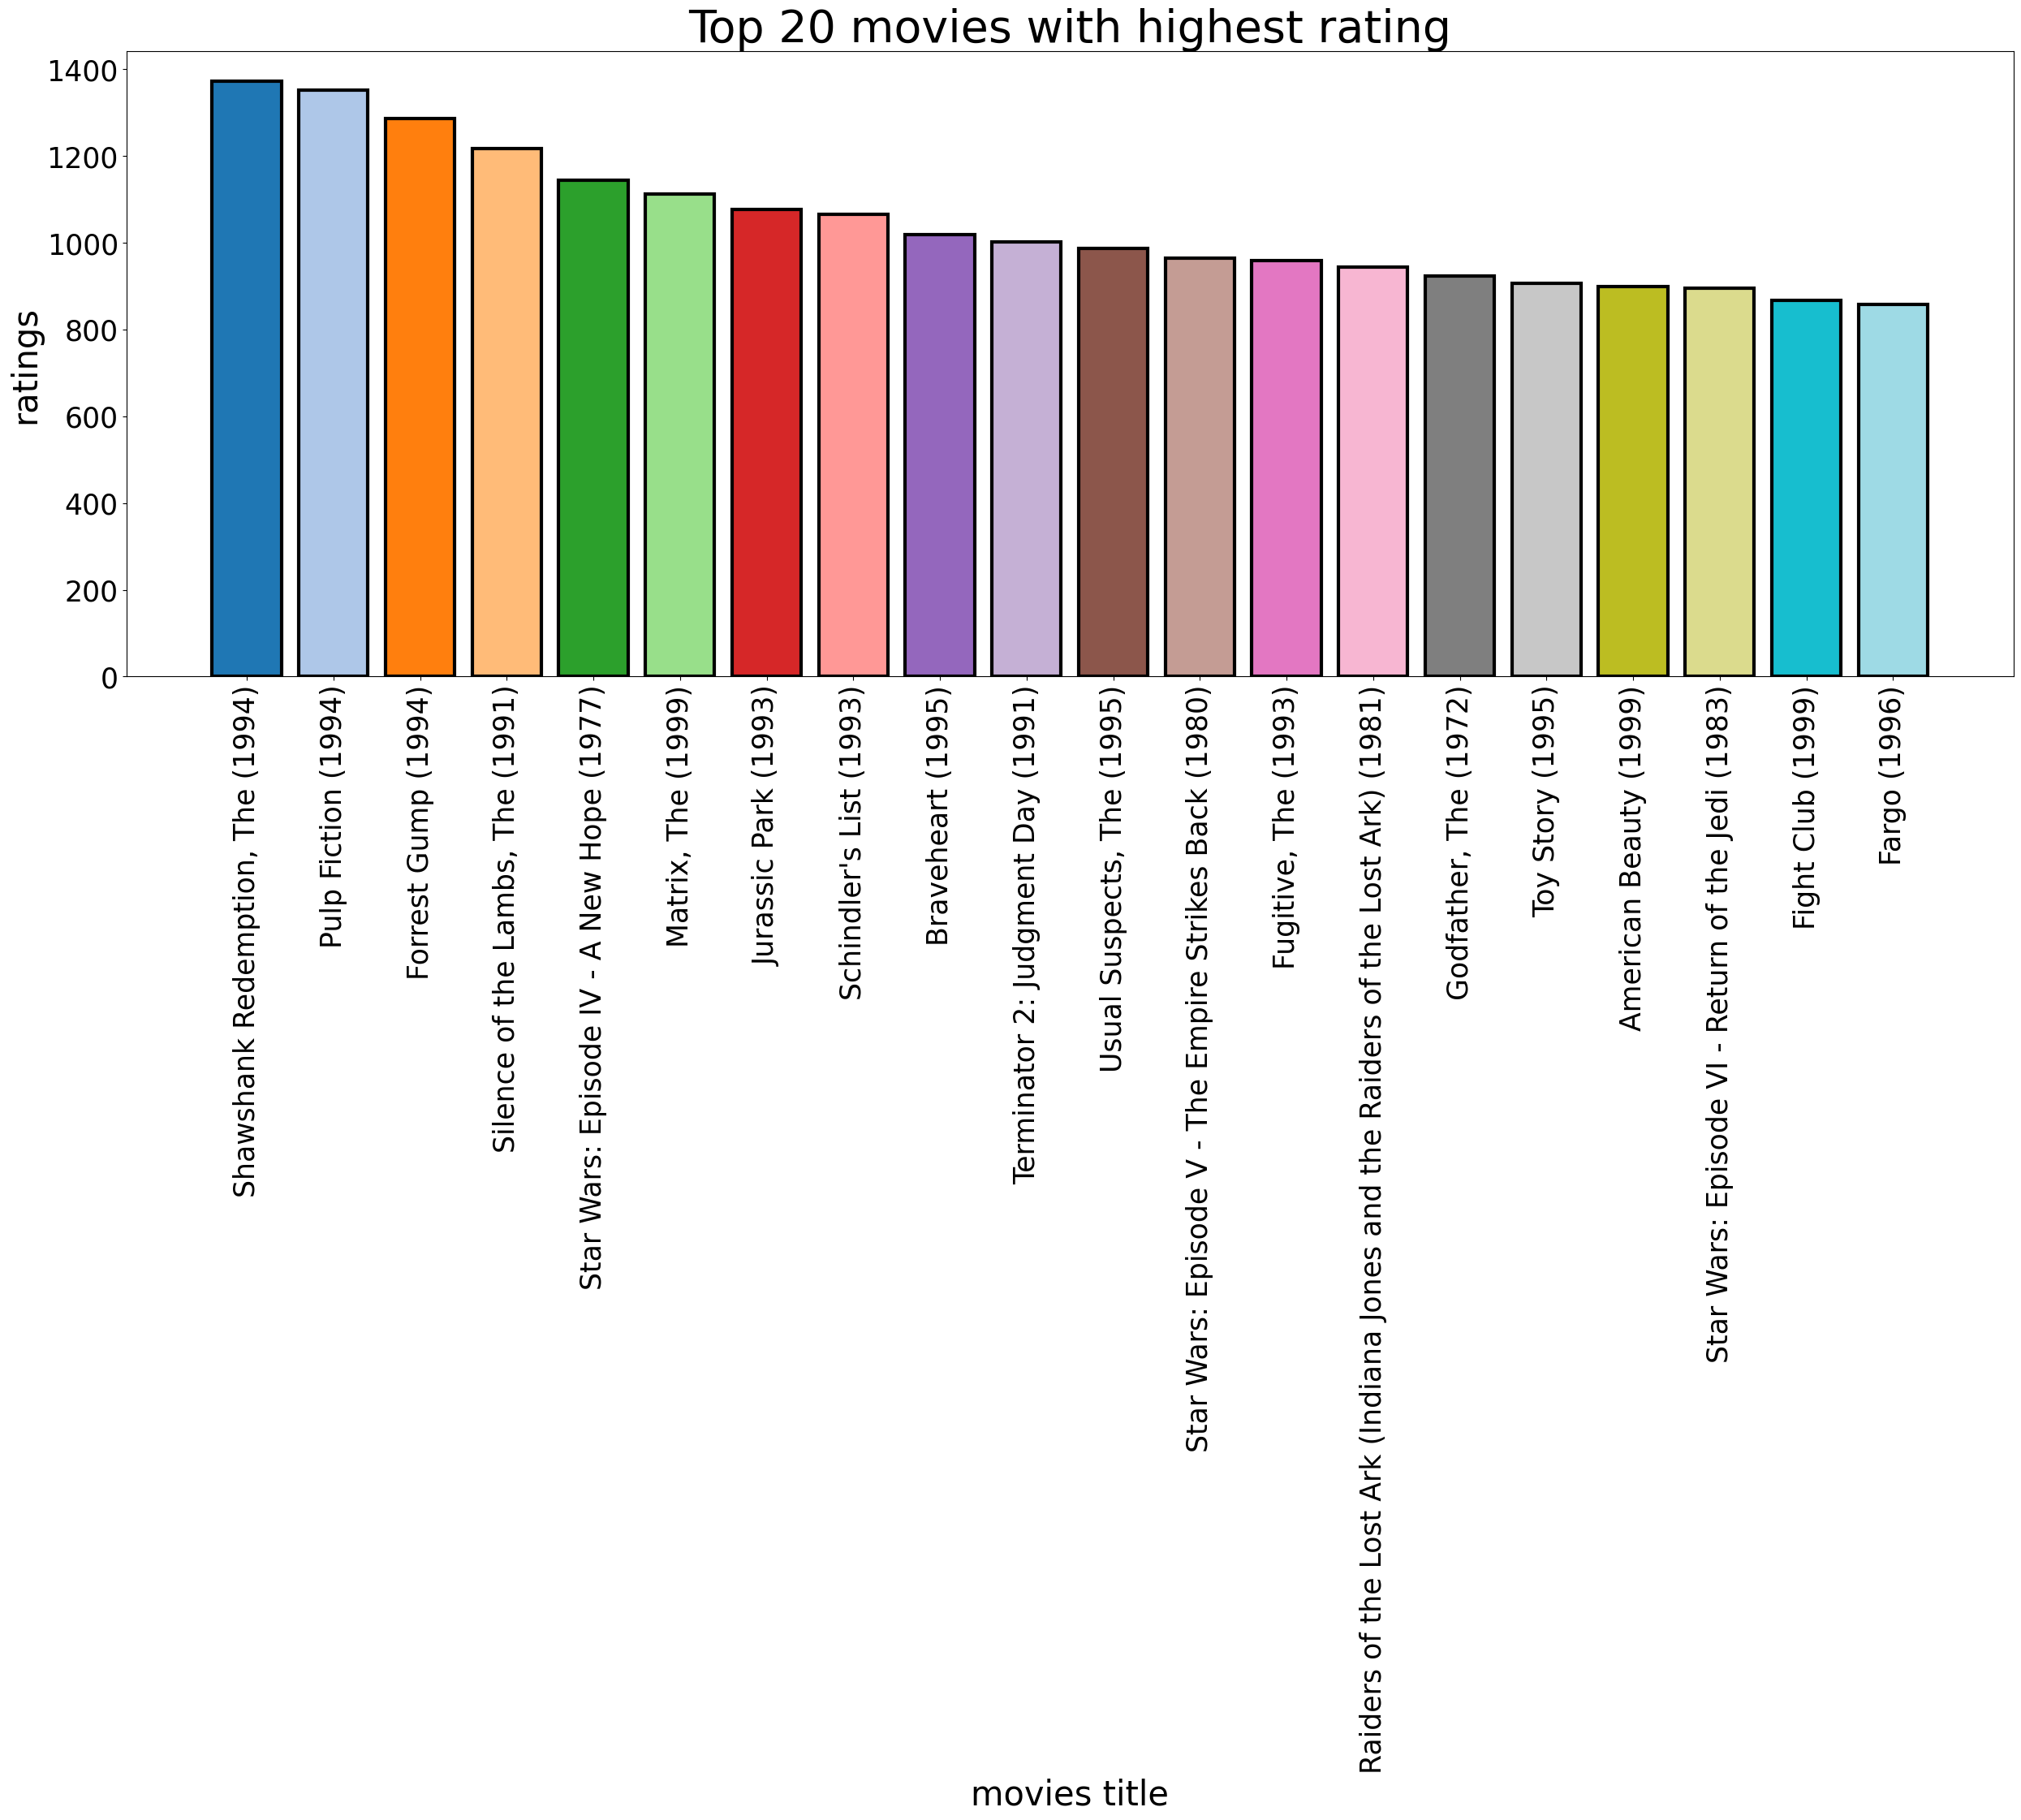

In [19]:
# Define the colormap
cmap = plt.get_cmap('tab20')

# Create a numpy array of colors based on the colormap
colors = cmap(np.arange(len(high_rated)) % cmap.N)

# Create the bar chart
plt.figure(figsize=(30, 10))
plt.title('Top 20 movies with highest rating', fontsize=40)
plt.ylabel('ratings', fontsize=30)
plt.xticks(fontsize=25, rotation=90)
plt.xlabel('movies title', fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index, high_rated['rating'], linewidth=3, edgecolor='black', color=colors)

# Display the bar chart
plt.show()


In [20]:
new_mov2=new_mov.groupby('title')[['rating']].count()
rating_count_20=new_mov2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


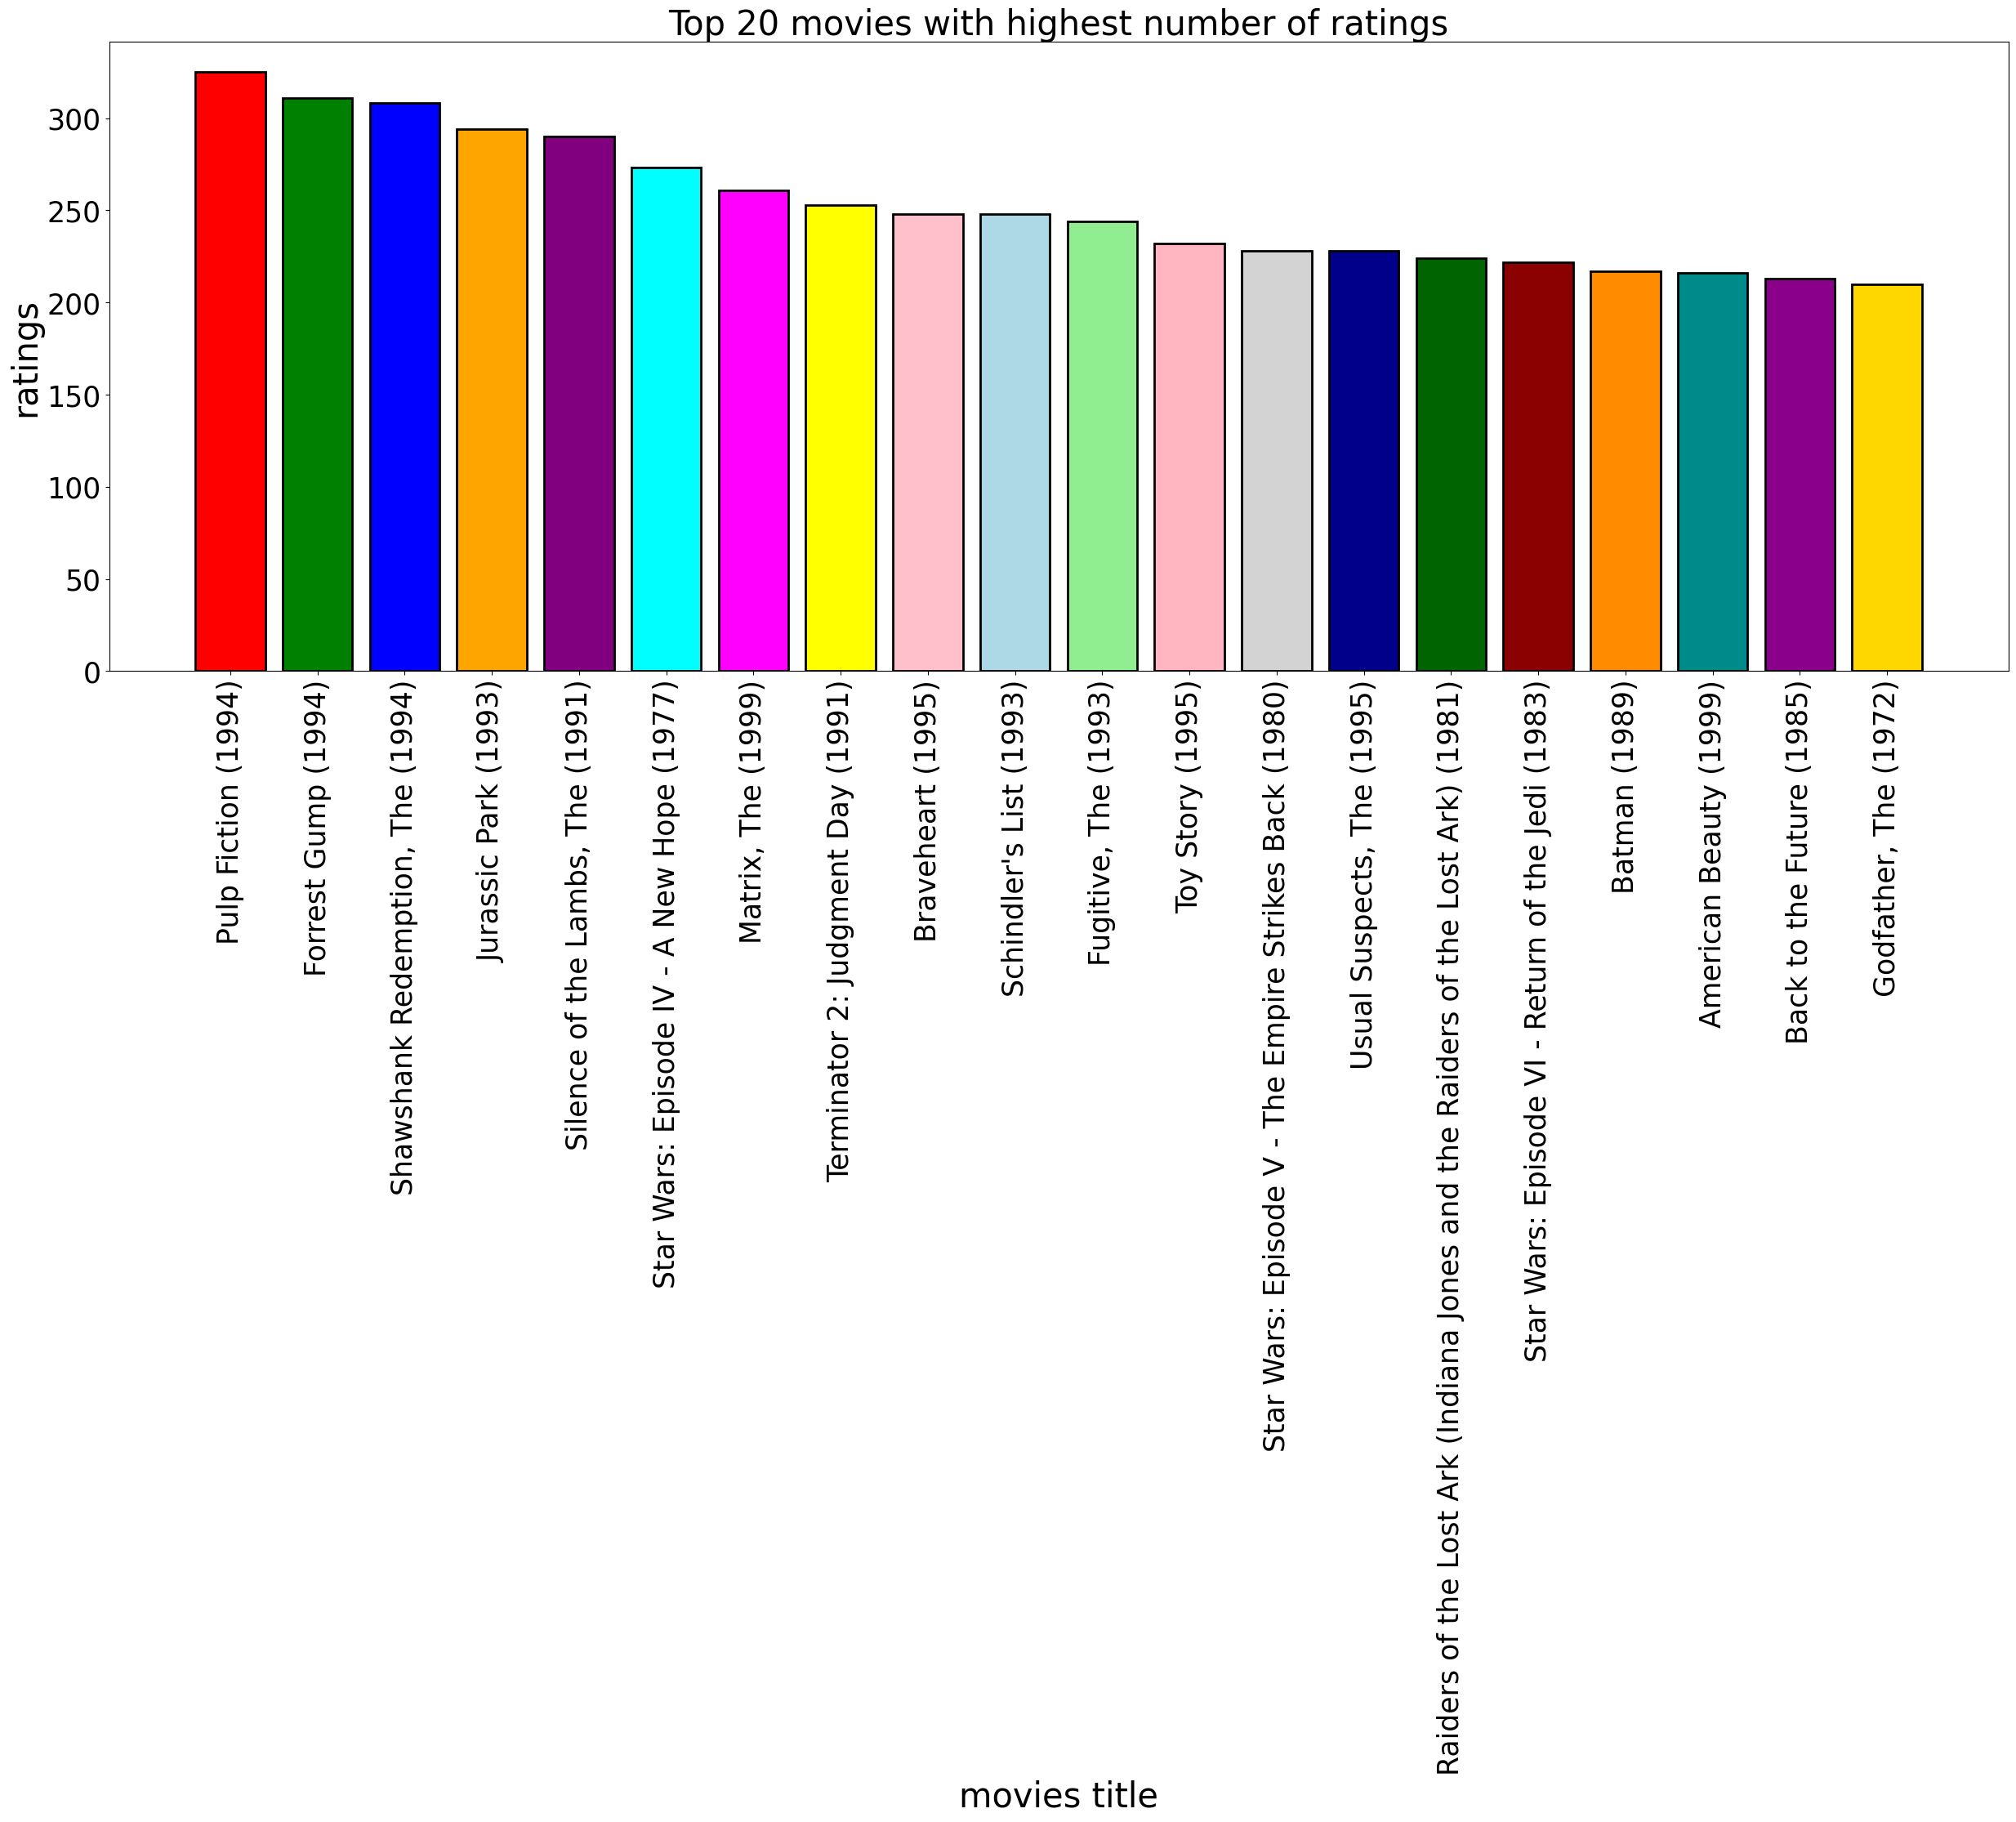

In [21]:
# Define custom colors for each bar
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'pink', 'lightblue',
          'lightgreen', 'lightpink', 'lightgray', 'darkblue', 'darkgreen', 'darkred', 'darkorange', 'darkcyan', 'darkmagenta', 'gold']

# Create the bar chart with custom colors
plt.figure(figsize=(30, 10))
plt.title('Top 20 movies with highest number of ratings', fontsize=30)
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title', fontsize=30)
plt.ylabel('ratings', fontsize=30)

plt.bar(rating_count_20.index, rating_count_20.rating, color=colors, edgecolor='black', linewidth=2)

# Display the bar chart
plt.show()


In [22]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(mov['genres'])

In [23]:
movie_user = new_mov.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [25]:
indices=pd.Series(mov.index,index=mov['title'])
titles=mov['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [26]:
recommendations('Waiting to Exhale (1995)')

10                  American President, The (1995)
48                         Mighty Aphrodite (1995)
53               Postman, The (Postino, Il) (1994)
86                          Beautiful Girls (1996)
168                 Something to Talk About (1995)
195                        Don Juan DeMarco (1995)
203    Eat Drink Man Woman (Yin shi nan nu) (1994)
250                           Nobody's Fool (1994)
311                        Corrina, Corrina (1994)
320                  It Could Happen to You (1994)
331                           Reality Bites (1994)
482                    Sleepless in Seattle (1993)
485                              Son in Law (1993)
631                    Month by the Lake, A (1995)
659                     Walking and Talking (1996)
682                                    Emma (1996)
693                                 Tin Cup (1996)
715                           Twelfth Night (1996)
719                 Philadelphia Story, The (1940)
730                          Ap